# Car Princing Exploratory Data Analisist

### 1. Import and read Car Pricing Data

In [1]:
# Importing libraries
import pandas as pd
import sqlalchemy
from os import getenv

In [2]:
# Connection to data base
MYSQL_USER = getenv('MYSQL_USER')
MYSQL_PWD= getenv('MYSQL_PWD')
MYSQL_HOST = "localhost"
MYSQL_DB = "FastAPI_Deploy_ML_Model"
mysql_addres = 'mysql+mysqldb://{}:{}@{}/{}'.format(MYSQL_USER, MYSQL_PWD,
                                                  MYSQL_HOST, MYSQL_DB)
mysql_engine = sqlalchemy.create_engine(mysql_addres)

In [4]:
# Read data
car_data = pd.read_sql("car_data", con=mysql_engine, index_col="index")
pd.set_option('display.expand_frame_repr', False)
car_data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
index,,,,,,,,,
0,Hero Passion X pro,2016,12417.55,33217,Petrol,Individual,Manual,0,11717.50
1,xcent,2017,10633.13,12905,Petrol,Dealer,Manual,0,9931.75
2,verna,2015,10881.40,62053,Diesel,Dealer,Manual,0,10180.25
3,ertiga,2016,11107.79,43897,Diesel,Dealer,Manual,0,10404.75
4,jazz,2016,10316.40,4108,Petrol,Dealer,Manual,0,9614.00


### 2. Exploratory Data Analisis

In [5]:
# import datasist library
import datasist as ds
ds.structdata.describe(car_data)

First five data points


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
index,,,,,,,,,
0,Hero Passion X pro,2016,12417.55,33217,Petrol,Individual,Manual,0,11717.50
1,xcent,2017,10633.13,12905,Petrol,Dealer,Manual,0,9931.75
2,verna,2015,10881.40,62053,Diesel,Dealer,Manual,0,10180.25
3,ertiga,2016,11107.79,43897,Diesel,Dealer,Manual,0,10404.75
4,jazz,2016,10316.40,4108,Petrol,Dealer,Manual,0,9614.00




Random five data points


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
index,,,,,,,,,
98526,city,2014,9582.60,41495,Petrol,Dealer,Manual,0,8875.25
86254,ciaz,2015,10975.38,51765,Diesel,Dealer,Manual,0,10271.85
44392,Activa 3g,2008,7177.52,500577,Petrol,Individual,Automatic,0,6477.17
30063,verna,2013,10446.40,38435,Petrol,Dealer,Automatic,0,9742.11
60737,Honda CB Shine,2007,6348.58,54148,Petrol,Individual,Manual,0,5648.12




Last five data points


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
index,,,,,,,,,
99995,ertiga,2015,11994.71,27787,Petrol,Dealer,Manual,0,11293.10
99996,corolla altis,2017,11725.64,10207,Petrol,Dealer,Manual,0,11024.00
99997,verna,2013,9601.40,46392,Diesel,Dealer,Manual,0,8898.15
99998,KTM RC200,2017,10846.78,4645,Petrol,Individual,Manual,0,10146.65
99999,i10,2012,9464.60,37035,Petrol,Dealer,Manual,0,8763.10




Shape of  data set: (100000, 9)


Size of  data set: 900000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Car_Name,object
Year,int64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64
Selling_Price,float64




Numerical Features in Data set
['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Selling_Price']


Categorical Features in Data set


['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']



Statistical Description of Columns


,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2014.059300,10454.815579,35544.731010,0.036080,9752.087633
std,2.592811,1497.176036,35908.164469,0.213913,1498.468367
min,2003.000000,3405.280000,606.000000,0.000000,2703.350000
25%,2013.000000,9406.007500,15760.000000,0.000000,8703.250000
50%,2015.000000,10628.705000,30595.500000,0.000000,9926.700000
75%,2016.000000,11639.782500,46476.000000,0.000000,10938.120000
max,2018.000000,12731.230000,502479.000000,3.000000,12028.000000




Description of Categorical Features


,count,unique,top,freq
Car_Name,100000,98,city,8919
Fuel_Type,100000,3,Petrol,78995
Seller_Type,100000,2,Dealer,65615
Transmission,100000,2,Manual,86541




Unique class Count of Categorical features


,Feature,Unique Count
0,Car_Name,98
1,Fuel_Type,3
2,Seller_Type,2
3,Transmission,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Car_Name,0,0.0
1,Year,0,0.0
2,Present_Price,0,0.0
3,Kms_Driven,0,0.0
4,Fuel_Type,0,0.0
5,Seller_Type,0,0.0
6,Transmission,0,0.0
7,Owner,0,0.0
8,Selling_Price,0,0.0


Unique Values in Car_Name is too large to plot




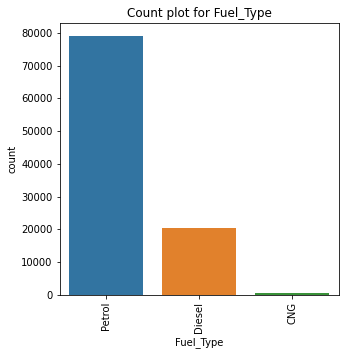

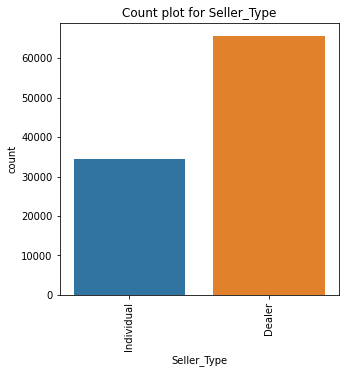

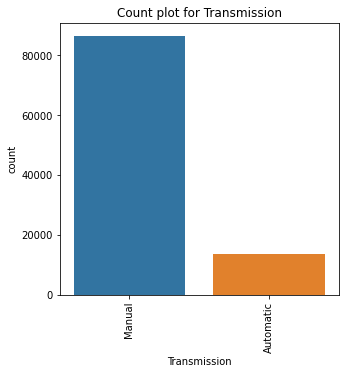

In [6]:
# Visualization
ds.visualizations.countplot(car_data)

Unique Values in Car_Name is too large to plot




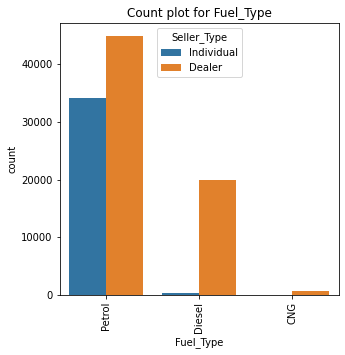

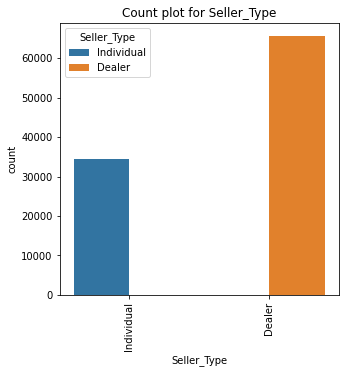

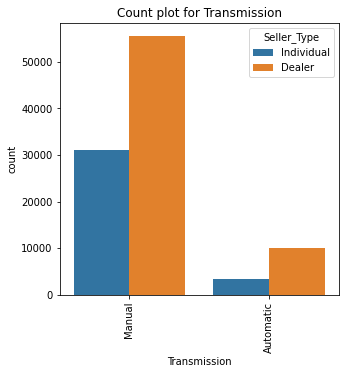

In [7]:
# Visualization by group
ds.visualizations.countplot(car_data, separate_by='Seller_Type')

### 3. Feature Engineering

Is the process of using domain knowledge to select and transform features from raw data before building a predictive model using ML.

[Actions]
1. Handling missing values
2. Creating new features
3. One Hot Encoding
4. Selecting features for modelling

The main goal of Featue Engineering is to get the best resul from an algorithms

In [8]:
# 1. Fill missing values
car_data = ds.feature_engineering.fill_missing_cats(car_data)
car_data = ds.feature_engineering.fill_missing_num(car_data)
print(car_data.columns)
car_data.head()

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
index,,,,,,,,,
0,Hero Passion X pro,2016,12417.55,33217,Petrol,Individual,Manual,0,11717.50
1,xcent,2017,10633.13,12905,Petrol,Dealer,Manual,0,9931.75
2,verna,2015,10881.40,62053,Diesel,Dealer,Manual,0,10180.25
3,ertiga,2016,11107.79,43897,Diesel,Dealer,Manual,0,10404.75
4,jazz,2016,10316.40,4108,Petrol,Dealer,Manual,0,9614.00


In [9]:
#2. Creating new or modify features
car_data['Year'] = 2022 - car_data['Year']
car_data =  car_data.drop('Car_Name', 1)
car_data.head()

/tmp/ipykernel_21145/2585077985.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  car_data =  car_data.drop('Car_Name', 1)


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
index,,,,,,,,
0,6,12417.55,33217,Petrol,Individual,Manual,0,11717.50
1,5,10633.13,12905,Petrol,Dealer,Manual,0,9931.75
2,7,10881.40,62053,Diesel,Dealer,Manual,0,10180.25
3,6,11107.79,43897,Diesel,Dealer,Manual,0,10404.75
4,6,10316.40,4108,Petrol,Dealer,Manual,0,9614.00


In [10]:
# 3. One Hot Encoding
car_data = pd.get_dummies(car_data, drop_first=True)
car_data.head()
car_data.head()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
index,,,,,,,,,
0,6,12417.55,33217,0,11717.50,0,1,1,1
1,5,10633.13,12905,0,9931.75,0,1,0,1
2,7,10881.40,62053,0,10180.25,1,0,0,1
3,6,11107.79,43897,0,10404.75,1,0,0,1
4,6,10316.40,4108,0,9614.00,0,1,0,1


<AxesSubplot:>

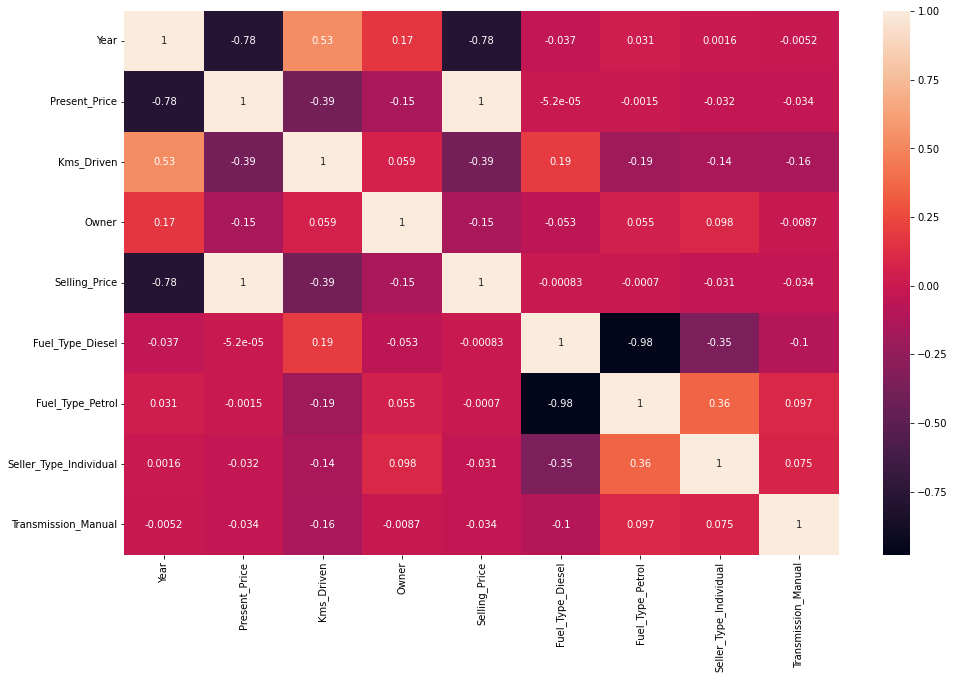

In [11]:
# 4. Selecting features for modelling
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[16,10]
sns.heatmap(car_data.corr(), annot=True)

### Modelling

In [12]:
# See data columns
car_data.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Selling_Price',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

##### Selecting features

In [13]:
# Data selecting all without remove any feature
x = car_data.drop('Selling_Price', axis=1)
y = car_data.Selling_Price

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
# Train the model LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

/home/bonnett93/FastAPI_Deploy_ML_Model/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [15]:
# evaluate model
from sklearn import metrics
import numpy as np
# predict Selling_Price
predictions =  model.predict(x_test)

# calculate RMSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# show feature importance for better visualization
#feat_importance = pd.Series(model.feature_importances_, index=x_train.columns)
#feat_importance.nlargest(5).plot(kind='barh', figsize=(20,5))
#plt.show()

RMSE:  3.4017073084228175


/home/bonnett93/FastAPI_Deploy_ML_Model/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [16]:
# Train model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model_1 = RandomForestRegressor()
model_1.fit(x_train, y_train)

/home/bonnett93/FastAPI_Deploy_ML_Model/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor()

/home/bonnett93/FastAPI_Deploy_ML_Model/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(


RMSE:  2.9987582683991403


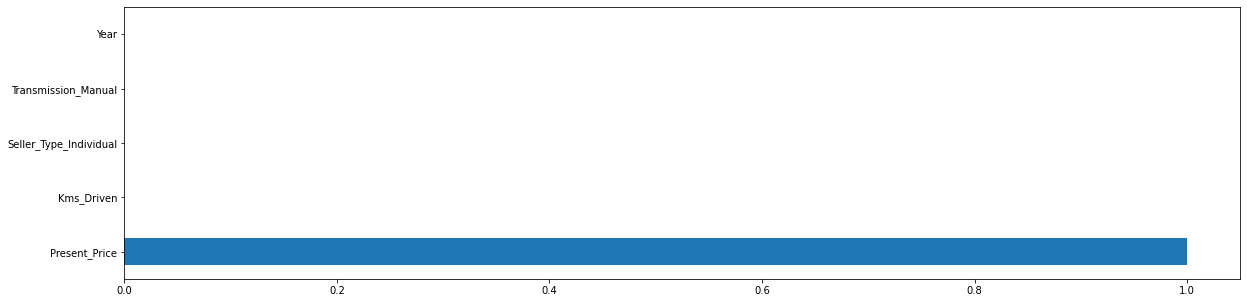

In [17]:
# Evaluate the model 1

#predict Selling_Price
predictions_1 = model_1.predict(x_test)

# calculate RMSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions_1)))

# show feature importance for better visualization
feat_importance = pd.Series(model_1.feature_importances_, index=x_train.columns)
feat_importance.nlargest(5).plot(kind='barh', figsize=(20,5))
plt.show()


In [27]:
import pickle
filename = 'linear_regresor_model.pkl'

file = open(filename, 'wb')
pickle.dump(model, file)

In [28]:
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)


In [19]:
print(predictions[:5])
x_test.head()

[10340.66843691  7798.61104603  9954.46961705 10035.03088089
  9949.10912479]


,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
index,,,,,,,,
75721,7,11043.00,28433,0,0,1,0,1
80184,9,8499.99,45299,0,0,1,1,1
19864,11,10658.89,56654,0,0,1,0,1
76699,7,10741.61,40511,0,1,0,0,0
92991,5,10647.82,1846,0,0,1,1,1
